# Deep Learning On MNIST Dataset Using Tensorflow

## By Maxfield Thompson

# 1). Introduction
**The goal of this notebook is to train a variety of deep neural networks to indentify hand-written digits in the MNIST dataset**. For more information on the MNIST dataset, check out this [link](https://en.wikipedia.org/wiki/MNIST_database). Many deep learning models have been trained on the MNIST dataset, but no formal experiment has been completed to study hidden layer depths / node shapes and how these parameters relate to total accuracy / run-time.

The layout of this notebook includes two experiments: one examines various node sizes / shapes with **three hidden layers**, the second experiment examines various node sizes / shapes with **seven hidden layers**. 



### Important Terms:

**Epoch**: In deep learning, an epcoh is a training interation through which weights are adjusted in the network

**Hidden Layer**: In a deep learning model, a hidden layer is any layer that is not an input or output layer. 

**Accuracy**: In this notebook, accuracy refers to the percent of hand-written digits in the MNIST test set that the model is able to accuractely classify.

### 1a). Load MNIST Data and Import Tensorflow Package

In [3]:
import tensorflow as tf

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# 2). Experiments with Three Hidden Layers
This experiment will try to train the fastest and most accurate model with **three hidden layers, and 50 epochs**. The control of the experiment will be how many nodes to have at each layer of the network. After each run through of the code below, I will save runtime and the accuracy scores so I can compare models. The following are how the hidden layers will change throughout each experiment:

experiment one (ex_1): This experiment will create a **rectangle shape** with the nodes
- hidden layer 1 : 100_nodes
- hidden layer 2 : 100_nodes
- hidden layer 3 : 100_nodes

experiment two (ex_2): This experiment will create a **cone shape** with the nodes
- hidden layer 1 : 500_nodes
- hidden layer 2 : 300_nodes
- hidden layer 3 : 100_nodes

experiment three (ex_3): This experiment will create an **hour glass shape** with the nodes
- hidden layer 1 : 500_nodes
- hidden layer 2 : 50_nodes
- hidden layer 3 : 350_nodes

experiment four (ex_4): This experiment will create a **narrow rectangle shape** with the nodes
- hidden layer 1 : 25_nodes
- hidden layer 2 : 25_nodes
- hidden layer 3 : 25_nodes

experiment five (ex_5): This experiment will create a **narrow reverse cone** with the nodes
- hidden layer 1 : 10_nodes
- hidden layer 2 : 20_nodes
- hidden layer 3 : 50_nodes

experiment six (ex_6): This experiment will create a **wide cone** with the nodes
- hidden layer 1 : 1500_nodes
- hidden layer 2 : 750_nodes
- hidden layer 3 : 100_nodes

experiment seven (ex_7): This experiment will create a **narrow hour glass** with the nodes
- hidden layer 1 : 50_nodes
- hidden layer 2 : 25_nodes
- hidden layer 3 : 50_nodes

### 2a). Code to Create the Deep Learning Models
The following code is where the deep learning model is created. In order to run the experiments the only parameters being changed are in the first couple lines, the n_nodes_h(1,2 or 3). This controls the number of nodes in each hidden layer of the network. 

In [194]:
import time

n_nodes_h1 = 50
n_nodes_h2 = 25
n_nodes_h3 = 50

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')


def neural_network_model(data):
    
    # (input_data * weights) + biases
    
    hidden_1 = {'weights': tf.Variable(tf.random_normal([784, n_nodes_h1])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h1]))} 
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_nodes_h1, n_nodes_h2])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_nodes_h2, n_nodes_h3])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_h3, n_classes])),
               'biases' : tf.Variable(tf.random_normal([n_classes]))}
    
    # Creates random weights the size of the input, which is 784 each pixel
    
    layer_1 = tf.add(tf.matmul(data, hidden_1['weights']), hidden_1['biases'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, hidden_2['weights']), hidden_2['biases'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, hidden_3['weights']), hidden_3['biases'])
    layer_3 = tf.nn.relu(layer_3)
    
    output = tf.matmul(layer_3, output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(x):
    predictions = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(predictions, y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    # cycles of feedforward + backprob
    hm_epochs = 50
    global graph_y
    graph_y = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        start = time.time()
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples / batch_size)):
                e_x, e_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: e_x, y: e_y})
                epoch_loss += c
            print('Epoch', epoch, ' completed out of ', hm_epochs, '. Loss: ', epoch_loss)
        
            correct = tf.equal(tf.argmax(predictions,1), tf.argmax(y,1))
        
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            acc = accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
            print("Accuracy:", acc)
            graph_y.append(acc)
            
        end = time.time()
        global final_time
        final_time = end - start
        print("Final time is: ", final_time)

In [195]:
train_neural_network(x)

Epoch 0  completed out of  50 . Loss:  87718.4269209
Accuracy: 0.2563
Epoch 1  completed out of  50 . Loss:  3174.27036619
Accuracy: 0.1338
Epoch 2  completed out of  50 . Loss:  1487.06859255
Accuracy: 0.1196
Epoch 3  completed out of  50 . Loss:  1340.46209955
Accuracy: 0.1236
Epoch 4  completed out of  50 . Loss:  1296.05348635
Accuracy: 0.1252
Epoch 5  completed out of  50 . Loss:  1279.2550087
Accuracy: 0.1189
Epoch 6  completed out of  50 . Loss:  1261.76920009
Accuracy: 0.1313
Epoch 7  completed out of  50 . Loss:  1240.24031162
Accuracy: 0.149
Epoch 8  completed out of  50 . Loss:  1227.69893265
Accuracy: 0.1657
Epoch 9  completed out of  50 . Loss:  1193.35346174
Accuracy: 0.1812
Epoch 10  completed out of  50 . Loss:  1140.95408642
Accuracy: 0.2336
Epoch 11  completed out of  50 . Loss:  1103.64929783
Accuracy: 0.2601
Epoch 12  completed out of  50 . Loss:  1056.56477404
Accuracy: 0.274
Epoch 13  completed out of  50 . Loss:  1019.29925251
Accuracy: 0.3054
Epoch 14  completed

### 2b). Run-time and Accuracy Scores for Each Sub-experiment
Each time I ran the function *train_neural_network* I saved the accuracy outputs as ex*_*(experiment number) and the time each experiment took as time*_*ex*_*(experiment number). Thus by running the above code seven times (changing the parameters to meet the experiment criteria), I produced accuracy scores and run times for each experiment.

In [196]:
ex_7 = graph_y
time_ex_7 = final_time

In [101]:
ex_1
time_ex_1

247.45012497901917

In [102]:
ex_2
time_ex_2

866.3270261287689

In [168]:
ex_3
time_ex_3

902.5772960186005

In [173]:
ex_4
time_ex_4

139.61348485946655

In [179]:
ex_5
time_ex_5

133.50507307052612

In [191]:
ex_6
time_ex_6

3183.254653930664

In [197]:
ex_7
time_ex_7

185.58504104614258

In [274]:
ex_1_total_nodes = 300
ex_2_total_nodes = 900
ex_3_total_nodes = 900
ex_4_total_nodes = 75
ex_5_total_nodes = 80
ex_6_total_nodes = 2350
ex_7_total_nodes = 125

### 2c). Import Graphing Packages

In [169]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plot

### 2d). Convert Output Data into a Graphable Format

In [322]:
acc_dict = {"timepoint":list(range(1,51))+list(range(1,51))+list(range(1,51))+list(range(1,51))+list(range(1,51))+list(range(1,51))+list(range(1,51)),
'Hidden_Layer_Shape':["rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle",
                   "rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle",
                   "rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle",
                   "rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle",
                   "rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle","rectangle",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass",
                   "hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass",
                   "hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass",
                   "hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass",
                   "hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass","hour_glass",
                   "narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle",
                   "narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle",
                   "narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle",
                   "narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle",
                   "narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle","narrow_rectangle",
                   "narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone",
                   "narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone",
                   "narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone",
                   "narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone",
                   "narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone","narrow_reverse_cone",
                   "wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone","wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone",
                   "wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone","wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone",
                   "wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone","wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone",
                   "wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone","wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone",
                   "wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone","wide_cone", "wide_cone", "wide_cone", "wide_cone", "wide_cone",
                   "narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass",
                   "narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass",
                   "narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass",
                   "narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass",
                   "narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass","narrow_hour_glass"],
'accuracy_score':(ex_1 + ex_2 + ex_3 + ex_4 + ex_5 + ex_6 + ex_7)}
acc_dataframe = pd.DataFrame.from_dict(data = acc_dict, orient= "columns")

### 2e). Graphing Accuracy Scores and Epochs by Model Shape

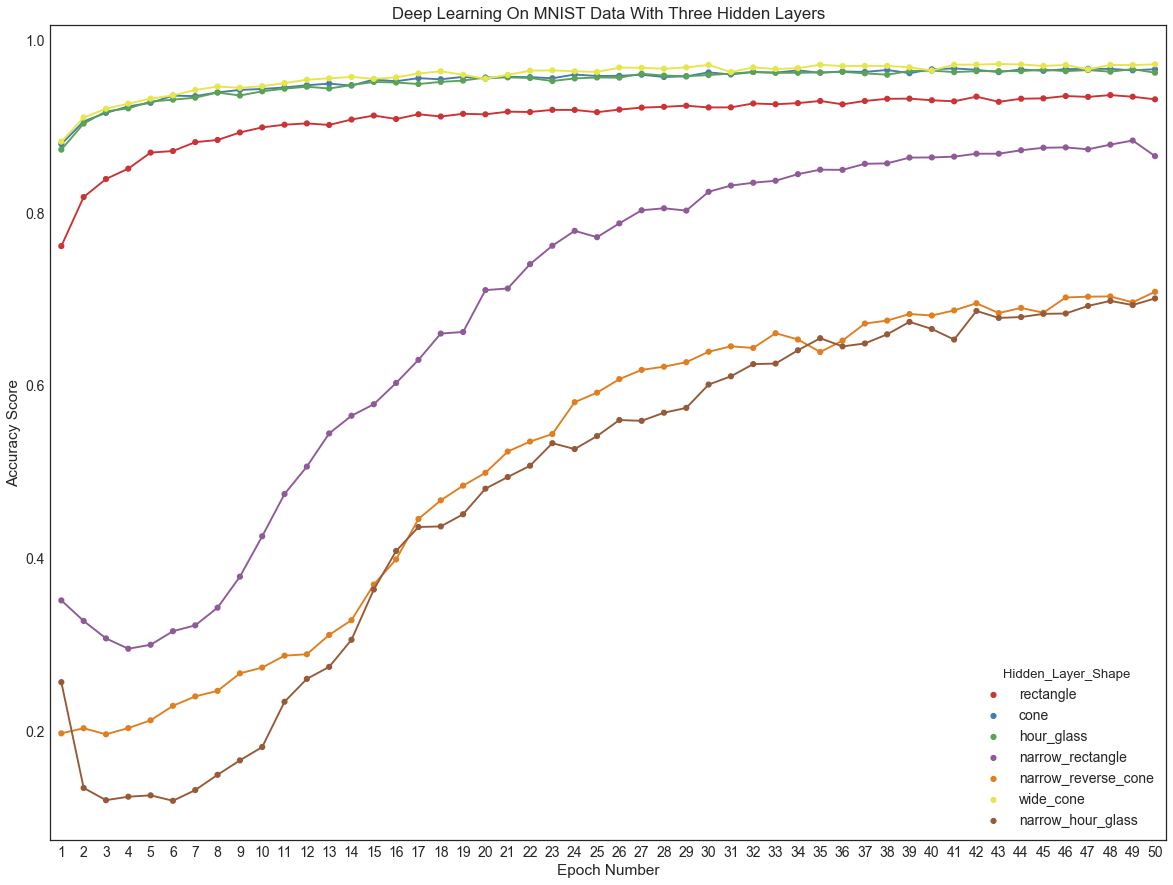

In [323]:
sns.set_context("paper", font_scale = 1.75) 
plot.figure(figsize=(20, 15))
#plot.xticks(rotation=45)
splot = sns.pointplot(data=acc_dataframe, x="timepoint", y = "accuracy_score", hue ="Hidden_Layer_Shape", 
                      scale = 0.75, palette = sns.color_palette("Set1", n_colors=7, desat=.75))
splot.set_ylabel('Accuracy Score')
splot.set_xlabel('Epoch Number')
splot.set_title("Deep Learning On MNIST Data With Three Hidden Layers")
plot.show()

In [276]:
print("The max accuracy of experiment one, rectangle with", ex_1_total_nodes ,"total nodes, was: ", max(ex_1), "\nwith a total training time of ", round(time_ex_1), "seconds.", "\n")
print("The max accuracy of experiment two, cone with", ex_2_total_nodes ,"total nodes, was: ", max(ex_2), "\nwith a total training time of ", round(time_ex_2), "seconds.", "\n")
print("The max accuracy of experiment three, hour_glass with", ex_3_total_nodes ,"total nodes, was: ", max(ex_3), "\nwith a total training time of ", round(time_ex_3), "seconds.", "\n")
print("The max accuracy of experiment four, narrow_rectangle with", ex_4_total_nodes ,"total nodes, was: ", max(ex_4), "\nwith a total training time of ", round(time_ex_4), "seconds.", "\n")
print("The max accuracy of experiment five, narrow_reverse_cone with", ex_5_total_nodes ,"total nodes, was: ", max(ex_5), "\nwith a total training time of ", round(time_ex_5), "seconds.", "\n")
print("The max accuracy of experiment six, wide_cone with", ex_6_total_nodes ,"total nodes, was: ", max(ex_6), "\nwith a total training time of ", round(time_ex_6), "seconds.", "\n")
print("The max accuracy of experiment seven, narrow_hour_glass with", ex_7_total_nodes ,"total nodes, was: ", max(ex_7), "\nwith a total training time of ", round(time_ex_7), "seconds.", "\n")

The max accuracy of experiment one, rectangle with 300 total nodes, was:  0.9363 
with a total training time of  247 seconds. 

The max accuracy of experiment two, cone with 900 total nodes, was:  0.9672 
with a total training time of  866 seconds. 

The max accuracy of experiment three, hour_glass with 900 total nodes, was:  0.9664 
with a total training time of  903 seconds. 

The max accuracy of experiment four, shallow_rectangle with 75 total nodes, was:  0.8837 
with a total training time of  140 seconds. 

The max accuracy of experiment five, shallow_reverse_cone with 80 total nodes, was:  0.7085 
with a total training time of  134 seconds. 

The max accuracy of experiment six, wide_cone with 2350 total nodes, was:  0.9723 
with a total training time of  3183 seconds. 

The max accuracy of experiment seven, shallow_hour_glass with 125 total nodes, was:  0.7008 
with a total training time of  186 seconds. 



### 2f). Interpret Graphed Results

In the above graph the **wide cone** shape recieved the highest accuracy at 97.23%. However, it also had the highest number of nodes in the network (2350), and the highest training time at 3183 seconds, or roughly 53 minutes. 

Now the **cone** shape recieved an accuracy of 96.72% (only .5% less than the wide cone), had only 900 nodes, and trained in 866 seconds. This network shape was almost as accurate as its larger counterpart, yet produced those results in nearly a fourth the time. 

Of the shallow network shapes (shallow_rectangle, shallow_reverse_cone, and shallow_hour_glass), **narrow_rectangle** had the best accuracy at 88.37%. This is surprising because it had the smallest node structure (75 nodes) and *nearly* the fastest train time. 

Now the **hour_glass** shape was also a close contender for best overall network shape, but was slightly slower and less accurate than the cone shape. 

### 2g). Speed Verse Total Node Counts
The goal of this section is to see how the number of nodes effects the training time. Do larger networks have higher or lower node/per_second train times than smaller networks?

In [326]:
speed_dict = {"Experiment_Shape" : ("rectangle", "cone", "hour_glass", "narrow_rectangle", "narrow_reverse_cone",
                                    "wide_cone", "narrow_hour_glass"),
             "Experiment_Average_Time_Per_Node" : ((time_ex_1/ex_1_total_nodes), (time_ex_2/ex_2_total_nodes), 
                                                   (time_ex_3/ex_3_total_nodes), (time_ex_4/ex_4_total_nodes),
                                                   (time_ex_5/ex_5_total_nodes), (time_ex_6/ex_6_total_nodes),
                                                   (time_ex_7/ex_7_total_nodes))}
                                                   
speed_dataframe = pd.DataFrame.from_dict(data = speed_dict, orient= "columns")

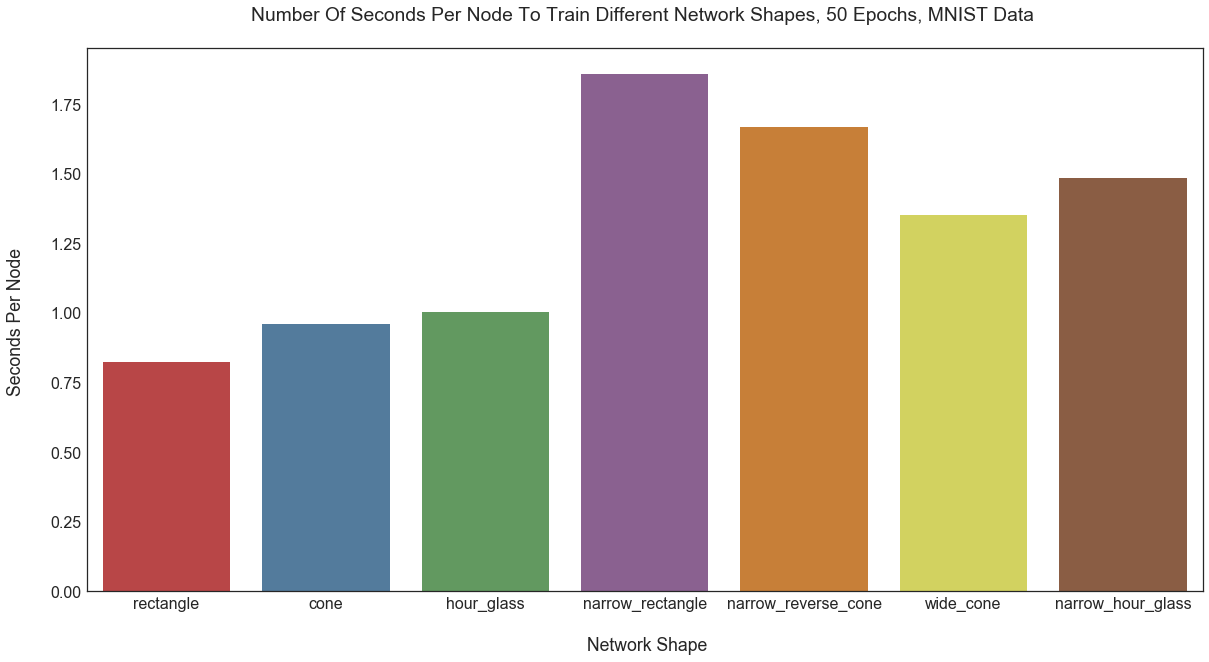

In [327]:
sns.set_context("paper", font_scale = 2.0) 
plot.figure(figsize=(20, 10))
splot = sns.barplot(x = "Experiment_Shape", y = "Experiment_Average_Time_Per_Node", data=speed_dataframe, palette = sns.color_palette("Set1", n_colors=7, desat=.75) )
splot.set_ylabel('Seconds Per Node \n')
splot.set_xlabel('\n Network Shape')
splot.set_title("Number Of Seconds Per Node To Train Different Network Shapes, 50 Epochs, MNIST Data \n")
plot.show()

### 2f). Barplot Interpretation
The results of this analysis were surprising to me. I would have expected larger networks to spent *more* time training per node, but the opposite is true. The shallow networks end up having the highest training time per node, with the highest per node training time being the **shallow_rectangle**. The faster training time per node network shape was the basic rectanglular network.

# 3). Experiments with Seven Hidden Layers
This experiment will try to train the fastest and most accurate model with **seven hidden layers, and 30 epochs**. The control of the experiment will be how many nodes to have at each layer of the network. After each run through of the code below, I will save runtime and the accuracy scores so I can compare models. The following are how the hidden layers will change throughout each experiment:

experiment one (ex_1): This experiment will create a **oscillating rectangle** with the nodes
- hidden layer 1 : 550_nodes
- hidden layer 2 : 650_nodes
- hidden layer 3 : 550_nodes
- hidden layer 4 : 650_nodes
- hidden layer 5 : 550_nodes
- hidden layer 6 : 650_nodes
- hidden layer 7 : 550_nodes

experiment two (ex_2): This experiment will create a **cone shape** with the nodes
- hidden layer 1 : 750_nodes
- hidden layer 2 : 650_nodes
- hidden layer 3 : 550_nodes
- hidden layer 4 : 450_nodes
- hidden layer 5 : 350_nodes
- hidden layer 6 : 250_nodes
- hidden layer 7 : 150_nodes

experiment three (ex_3): This experiment will create a **double_valley shape** with the nodes
- hidden layer 1 : 300_nodes
- hidden layer 2 : 100_nodes
- hidden layer 3 : 100_nodes
- hidden layer 4 : 700_nodes
- hidden layer 5 : 100_nodes
- hidden layer 6 : 100_nodes
- hidden layer 7 : 300_nodes

experiment four (ex_4): This experiment will create a **sharp_wave shape** with the nodes
- hidden layer 1 : 750_nodes
- hidden layer 2 : 35_nodes
- hidden layer 3 : 750_nodes
- hidden layer 4 : 35_nodes
- hidden layer 5 : 750_nodes
- hidden layer 6 : 35_nodes
- hidden layer 7 : 750_nodes

experiment five (ex_5): This experiment will create a **medium_rectangle** with the nodes
- hidden layer 1 : 350_nodes
- hidden layer 2 : 350_nodes
- hidden layer 3 : 350_nodes
- hidden layer 4 : 350_nodes
- hidden layer 5 : 350_nodes
- hidden layer 6 : 350_nodes
- hidden layer 7 : 350_nodes

experiment six (ex_6): This experiment will create a **huge_rectangle** with the nodes
- hidden layer 1 : 1500_nodes
- hidden layer 2 : 1500_nodes
- hidden layer 3 : 1500_nodes
- hidden layer 4 : 1500_nodes
- hidden layer 5 : 1500_nodes
- hidden layer 6 : 1500_nodes
- hidden layer 7 : 1500_nodes

experiment seven (ex_7): This experiment will create a **narrow_cone** with the nodes
- hidden layer 1 : 175_nodes
- hidden layer 2 : 150_nodes
- hidden layer 3 : 125_nodes
- hidden layer 4 : 100_nodes
- hidden layer 5 : 75_nodes
- hidden layer 6 : 50_nodes
- hidden layer 7 : 25_nodes

experiment eight (ex_8): This experiment will create a **very_narrow_rectangle** with the nodes
- hidden layer 1 : 5_nodes
- hidden layer 2 : 5_nodes
- hidden layer 3 : 5_nodes
- hidden layer 4 : 5_nodes
- hidden layer 5 : 5_nodes
- hidden layer 6 : 5_nodes
- hidden layer 7 : 5_nodes

### 3a). Code to Create the Deep Learning Models
The following code is where the deep learning model is created. In order to run the experiments the only parameters being changed are in the first couple lines, the n_nodes_h(1,2,3,4,5,6, or 7). This controls the number of nodes in each hidden layer of the network. 

In [334]:
import time

n_nodes_h1 = 175
n_nodes_h2 = 150
n_nodes_h3 = 125
n_nodes_h4 = 100
n_nodes_h5 = 75
n_nodes_h6 = 50
n_nodes_h7 = 25

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')


def neural_network_model(data):
    
    # (input_data * weights) + biases
    
    hidden_1 = {'weights': tf.Variable(tf.random_normal([784, n_nodes_h1])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h1]))} 
    
    hidden_2 = {'weights': tf.Variable(tf.random_normal([n_nodes_h1, n_nodes_h2])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h2]))}
    
    hidden_3 = {'weights': tf.Variable(tf.random_normal([n_nodes_h2, n_nodes_h3])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h3]))}
    
    hidden_4 = {'weights': tf.Variable(tf.random_normal([n_nodes_h3, n_nodes_h4])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h4]))}
    
    hidden_5 = {'weights': tf.Variable(tf.random_normal([n_nodes_h4, n_nodes_h5])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h5]))}
    
    hidden_6 = {'weights': tf.Variable(tf.random_normal([n_nodes_h5, n_nodes_h6])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h6]))}
    
    hidden_7 = {'weights': tf.Variable(tf.random_normal([n_nodes_h6, n_nodes_h7])),
               'biases' : tf.Variable(tf.random_normal([n_nodes_h7]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_h7, n_classes])),
               'biases' : tf.Variable(tf.random_normal([n_classes]))}
    
    # Creates random weights the size of the input, which is 784 each pixel
    
    layer_1 = tf.add(tf.matmul(data, hidden_1['weights']), hidden_1['biases'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, hidden_2['weights']), hidden_2['biases'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, hidden_3['weights']), hidden_3['biases'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, hidden_4['weights']), hidden_4['biases'])
    layer_4 = tf.nn.relu(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, hidden_5['weights']), hidden_5['biases'])
    layer_5 = tf.nn.relu(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, hidden_6['weights']), hidden_6['biases'])
    layer_6 = tf.nn.relu(layer_6)
    
    layer_7 = tf.add(tf.matmul(layer_6, hidden_7['weights']), hidden_7['biases'])
    layer_7 = tf.nn.relu(layer_7)
    
    output = tf.matmul(layer_7, output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(x):
    predictions = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(predictions, y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    # cycles of feedforward + backprob
    hm_epochs = 30
    global graph_y_2
    graph_y_2 = []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        start = time.time()
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples / batch_size)):
                e_x, e_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: e_x, y: e_y})
                epoch_loss += c
            print('Epoch', epoch, ' completed out of ', hm_epochs, '. Loss: ', epoch_loss)
        
            correct = tf.equal(tf.argmax(predictions,1), tf.argmax(y,1))
        
            accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
            acc = accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
            print("Accuracy:", acc)
            graph_y_2.append(acc)
            
        end = time.time()
        global final_time_2
        final_time_2 = end - start
        print("Final time is: ", final_time_2)

In [335]:
train_neural_network(x)

Epoch 0  completed out of  30 . Loss:  218295601.359
Accuracy: 0.5793
Epoch 1  completed out of  30 . Loss:  28883230.4473
Accuracy: 0.6602
Epoch 2  completed out of  30 . Loss:  14556705.1553
Accuracy: 0.7102
Epoch 3  completed out of  30 . Loss:  8720604.42627
Accuracy: 0.7302
Epoch 4  completed out of  30 . Loss:  5962977.05737
Accuracy: 0.7496
Epoch 5  completed out of  30 . Loss:  4216940.5083
Accuracy: 0.7598
Epoch 6  completed out of  30 . Loss:  3038780.30945
Accuracy: 0.7793
Epoch 7  completed out of  30 . Loss:  2334574.97449
Accuracy: 0.7925
Epoch 8  completed out of  30 . Loss:  1768939.79309
Accuracy: 0.793
Epoch 9  completed out of  30 . Loss:  1361410.60645
Accuracy: 0.8121
Epoch 10  completed out of  30 . Loss:  1113074.45132
Accuracy: 0.8113
Epoch 11  completed out of  30 . Loss:  862303.442169
Accuracy: 0.824
Epoch 12  completed out of  30 . Loss:  673997.682709
Accuracy: 0.8313
Epoch 13  completed out of  30 . Loss:  568883.335037
Accuracy: 0.8454
Epoch 14  completed

### 3b). Run-time and Accuracy Scores for Each Sub-experiment
Each time I ran the function *train_neural_network* I saved the accuracy outputs as ex*_*(experiment number) and the time each experiment took as time*_*ex*_*(experiment number). Thus by running the above code eight times (changing the parameters to meet the experiment criteria), I produced accuracy scores and run times for each experiment.

In [336]:
ex2_7 = graph_y_2
time_ex2_7 = final_time_2

In [308]:
ex2_1
time_ex2_1

2129.8676569461823

In [298]:
ex2_2
time_ex2_2

1977.4742958545685

In [302]:
ex2_3
time_ex2_3

487.78155183792114

In [313]:
ex2_4
time_ex2_4

725.9156448841095

In [325]:
ex2_5
time_ex2_5

847.6548402309418

In [331]:
ex2_6
time_ex2_6

13185.132326841354

In [337]:
ex2_7
time_ex2_7

246.29930186271667

In [319]:
ex2_8
time_ex2_8

91.60590291023254

In [345]:
ex2_1_total_nodes = 4130
ex2_2_total_nodes = 3150
ex2_3_total_nodes = 1200
ex2_4_total_nodes = 3105
ex2_5_total_nodes = 2450
ex2_6_total_nodes = 10500
ex2_7_total_nodes = 700
ex2_8_total_nodes = 25

### 3c). Convert Output Data into a Graphable Format

In [341]:
acc_dict_2 = {"epochs":list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31)),
'Hidden_Layer_Shape':["oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle",
                   "oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle",
                   "oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle","oscillating_rectangle",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "cone","cone","cone","cone","cone","cone","cone","cone","cone","cone",
                   "double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley",
                   "double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley",
                   "double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley","double_valley",
                   "sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave",
                   "sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave",
                   "sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave","sharp_wave",
                   "medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle",
                   "medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle",
                   "medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle","medium_rectangle",
                   "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle","huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle",
                   "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle","huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle",
                   "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle","huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle", "huge_rectangle",
                   "narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone",
                   "narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone",
                   "narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone","narrow_cone",
                   "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle","very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle",
                   "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle","very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle",
                   "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle","very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle", "very_narrow_rectangle"],
'accuracy_score':(ex2_1 + ex2_2 + ex2_3 + ex2_4 + ex2_5 + ex2_6 + ex2_7 + ex2_8)}
acc_dataframe_2 = pd.DataFrame.from_dict(data = acc_dict_2, orient= "columns")

### 3d). Graphing Accuracy Scores and Epochs by Model Shape

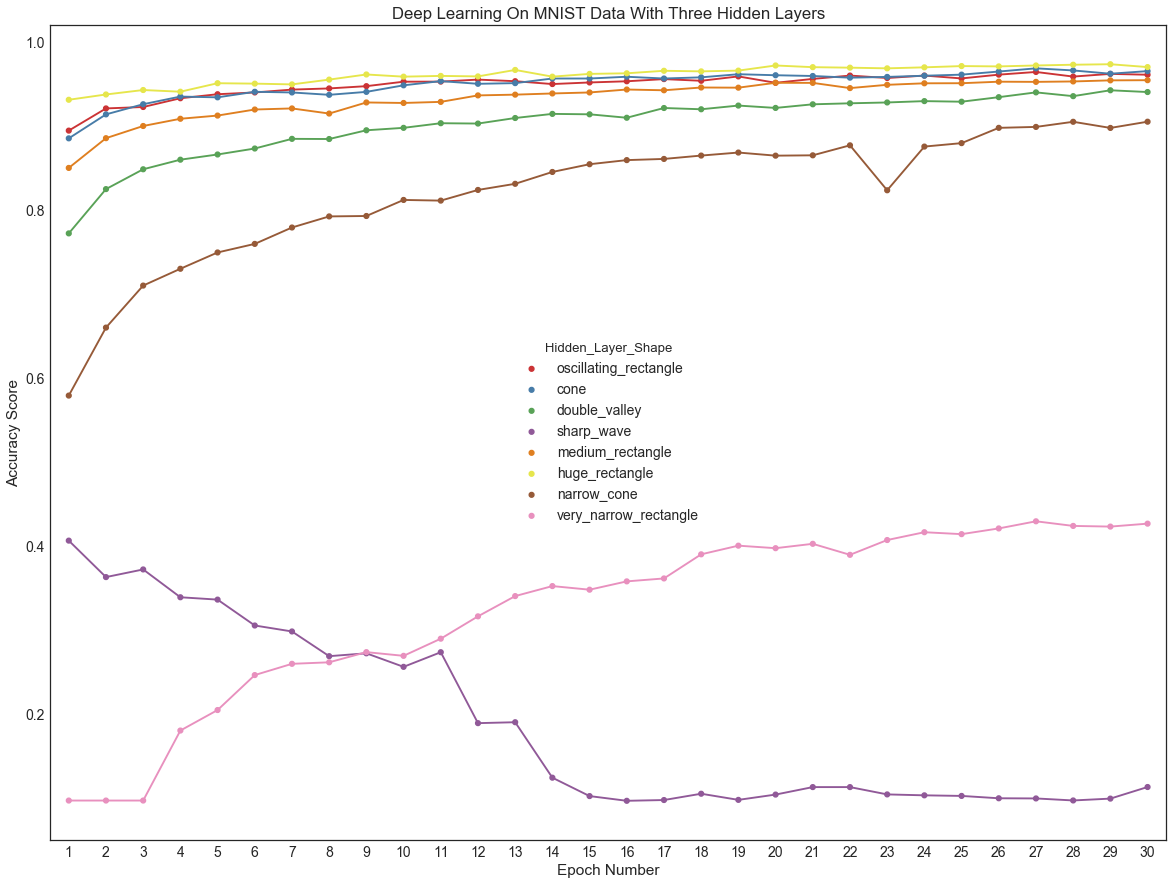

In [350]:
sns.set_context("paper", font_scale = 1.75) 
plot.figure(figsize=(20, 15))
#plot.xticks(rotation=45)
splot = sns.pointplot(data=acc_dataframe_2, x="epochs", y = "accuracy_score", hue ="Hidden_Layer_Shape", 
                      scale = 0.75, palette = sns.color_palette("Set1", n_colors=8, desat=.75))
splot.set_ylabel('Accuracy Score')
splot.set_xlabel('Epoch Number')
splot.set_title("Deep Learning On MNIST Data With Three Hidden Layers")
plot.show()

In [344]:
print("The max accuracy of experiment one, rectangle with", ex2_1_total_nodes ,"total nodes, was: ", max(ex2_1), "\nwith a total training time of ", round(time_ex2_1), "seconds.", "\n")
print("The max accuracy of experiment two, cone with", ex2_2_total_nodes ,"total nodes, was: ", max(ex2_2), "\nwith a total training time of ", round(time_ex2_2), "seconds.", "\n")
print("The max accuracy of experiment three, hour_glass with", ex2_3_total_nodes ,"total nodes, was: ", max(ex2_3), "\nwith a total training time of ", round(time_ex2_3), "seconds.", "\n")
print("The max accuracy of experiment four, narrow_rectangle with", ex2_4_total_nodes ,"total nodes, was: ", max(ex2_4), "\nwith a total training time of ", round(time_ex2_4), "seconds.", "\n")
print("The max accuracy of experiment five, narrow_reverse_cone with", ex2_5_total_nodes ,"total nodes, was: ", max(ex2_5), "\nwith a total training time of ", round(time_ex2_5), "seconds.", "\n")
print("The max accuracy of experiment six, wide_cone with", ex2_6_total_nodes ,"total nodes, was: ", max(ex2_6), "\nwith a total training time of ", round(time_ex2_6), "seconds.", "\n")
print("The max accuracy of experiment seven, narrow_hour_glass with", ex2_7_total_nodes ,"total nodes, was: ", max(ex2_7), "\nwith a total training time of ", round(time_ex2_7), "seconds.", "\n")

The max accuracy of experiment one, rectangle with 4130 total nodes, was:  0.9644 
with a total training time of  2130 seconds. 

The max accuracy of experiment two, cone with 3150 total nodes, was:  0.9687 
with a total training time of  1977 seconds. 

The max accuracy of experiment three, hour_glass with 1200 total nodes, was:  0.9426 
with a total training time of  488 seconds. 

The max accuracy of experiment four, narrow_rectangle with 3105 total nodes, was:  0.4067 
with a total training time of  726 seconds. 

The max accuracy of experiment five, narrow_reverse_cone with 2450 total nodes, was:  0.9546 
with a total training time of  848 seconds. 

The max accuracy of experiment six, wide_cone with 10500 total nodes, was:  0.9736 
with a total training time of  13185 seconds. 

The max accuracy of experiment seven, narrow_hour_glass with 700 total nodes, was:  0.9052 
with a total training time of  246 seconds. 



### 3e). Interpret Graphed Results

In the above graph the **wide_cone** shape recieved the highest accuracy at 97.36% (.1% higher accuracy than the wide cone with three hidden layers in the previous experiment). However, it also had the highest number of nodes in the network (10500, 8000 more nodes than the wide cone in the first experiment), and the highest training time at 13185 seconds, or roughly 220 minutes. This additional train time and network size is not worth the minimal additional accuracy the model gains. For example, the **hour_glass** shape arrives at 94.26% accuracy 25 times faster than the **wide_cone**, and it's roughtly one tenth of the network size. 

Now the **cone** shape recieved an accuracy of 96.72% (only .5% less than the wide cone), had only 900 nodes, and trained in 866 seconds. This network shape was almost as accurate as its larger counterpart, yet produced those results in nearly a fourth the time. This shape and size combo is a powerful model. 

Of the narrow network shapes (narrow_rectangle, narrow_reverse_cone, and narrow_hour_glass), **narrow_reverse_cone** had the best accuracy at 95.46%. It is surprising this shape performed better than the narrow_rectangle. Classically, the rectangular shape is the 'go-to' shape for deep learning structures. The cone shapes have all performed well on the MNIST dataset. The reverse cone shape forces some interesting interactions in the data; it quickly compresses the data in the first layer (similar to a diminsionality reduction) then slowly expands the reduced data until the last layer. Intuitively, one may think this wouldn't work, but of the narrow shapes, this shape and node size is the top performer. 

### 3f). Speed Verse Total Node Counts
The goal of this section is to see how the number of nodes effects the training time. Do larger networks have higher or lower node/per_second train times than smaller networks?

In [348]:
speed_dict_2 = {"Experiment_Shape" : ("oscillating rectangle", "cone", "double_valley", "sharp_wave", "medium_rectangle",
                                    "huge_rectangle", "narrow_cone","very_narrow_rectangle"),
             "Experiment_Average_Time_Per_Node" : ((time_ex2_1/ex2_1_total_nodes), (time_ex2_2/ex2_2_total_nodes), 
                                                   (time_ex2_3/ex2_3_total_nodes), (time_ex2_4/ex2_4_total_nodes),
                                                   (time_ex2_5/ex2_5_total_nodes), (time_ex2_6/ex2_6_total_nodes),
                                                   (time_ex2_7/ex2_7_total_nodes), (time_ex2_7/ex2_7_total_nodes))}
                                                   
speed_dataframe_2 = pd.DataFrame.from_dict(data = speed_dict_2, orient= "columns")

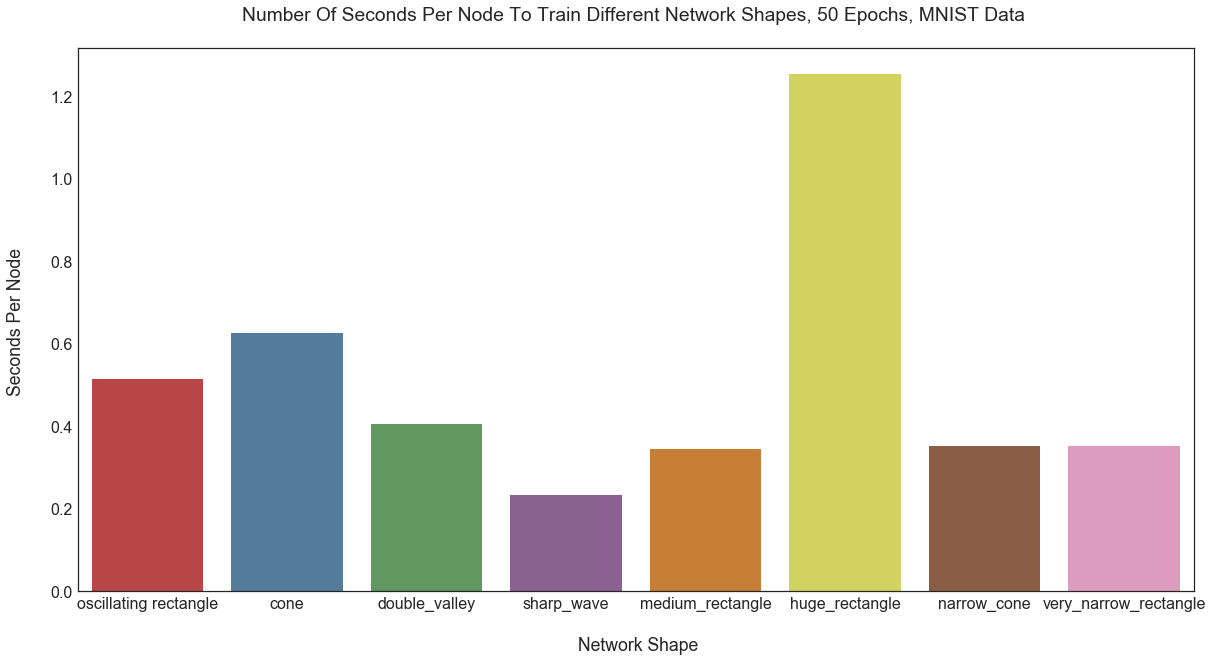

In [351]:
sns.set_context("paper", font_scale = 2.0) 
plot.figure(figsize=(20, 10))
splot = sns.barplot(x = "Experiment_Shape", y = "Experiment_Average_Time_Per_Node", data=speed_dataframe_2, palette = sns.color_palette("Set1", n_colors=8, desat=.75) )
splot.set_ylabel('Seconds Per Node \n')
splot.set_xlabel('\n Network Shape')
splot.set_title("Number Of Seconds Per Node To Train Different Network Shapes, 50 Epochs, MNIST Data \n")
plot.show()

### 3g). Barplot Interpretation
These results are different than the run time results in experiment_1. I am surprised the **huge_rectangle** learning shape has such a high train time per node. This could be due to a higher density of interconnections between layers, thus creating more total weights to optimize, thus increasing the train time. However, with this theory one would expect the **sharp_wave** learning shape to be higher in the training time per node. Instead, this shape had the fastest per node train time. Interesting.

In the first experiment, I stated that I expected larger networks to spent *more* time training per node, but then found smaller networks spending more training time per node. Now that the hidden layers have increased, my original thought is shown to hold true: all the narrow shapes have low run times, and the larger node shapes have longer per node train times. This trend is to be expected, but (as seen in experiment_1) seems to flip when dealing with small hidden layer depths. This insight is a valuable trend to understand when constructing deep neural networks. This would lead me to favor wide networks when working with small hidden layer depths, and short networks when working with larger hidden layer depths.